<a href="https://colab.research.google.com/github/louis-not/Notogo-ML/blob/main/dataset/Cleaning_Form.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules

dataset : https://docs.google.com/spreadsheets/d/1BNAE_Gb6SE5HlUPzcwJs-EfnWOGGwOQ-XdstOkjAVt8/edit?usp=sharing

In [52]:
import pandas as pd
import numpy as np
import random
import matplotlib as plt
from itertools import chain
import os
from google.colab import files

# getting data
from google.colab import auth
import gspread
from google.auth import default
from gspread_dataframe import get_as_dataframe, set_with_dataframe

auth.authenticate_user()
creds, _ = default()

# Run Preprocessing

In [2]:

gc = gspread.authorize(creds)

# # User Feature
# UserFeature = gc.open('capstone_dataset').sheet1
# rows = UserFeature.get_all_values()
# df = pd.DataFrame.from_records(rows[1:], columns=rows[0])

# Survey Form
survey = gc.open('Survey Wishlist_Fix (Responses)').worksheet('Form Responses 1')
rows = survey.get_all_values()
dfSurvey = pd.DataFrame.from_records(rows[1:], columns=rows[0])

In [3]:
dfSurvey.head(3)

,Timestamp,Informasi yang sudah diberikan benar dan hanya akan digunakan untuk keperluan riset pengembangan aplikasi capstone project kami,Inisial,Umur,Jenis Kelamin,Provinsi domisili saat ini,Pekerjaan,"Pergi berwisata ke pantai/laut (ex: pantai Ancol, Sawarna, Raja Ampat, dll.)","Pergi berwisata ke gunung (ex: gunung bromo, gunung gede, dll)","Jalan - jalan ke danau di Indonesia (ex: danau toba, danau singkarak, dll)",...,Goal 2,Kapan kamu ingin mencapai goals kamu?(2),Goal 3,Kapan kamu ingin mencapai goals kamu?(3),Goal 4,Kapan kamu ingin mencapai goals kamu?(4),Goal 5,Kapan kamu ingin mencapai goals kamu?(5),opsional: email kamu (untuk pengiriman personalized bucket list),Kode Referral:
0,5/4/2022 22:12:26,Mengerti,L,21,Laki-Laki,DKI Jakarta,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,...,Beli rumah pertama,5/4/2026,makan es krim ragusa,5/31/2022,,,,,mayco.louis@gmail.com,
1,5/4/2022 23:03:07,Mengerti,WA,21,Laki-Laki,Jawa Barat,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",...,Berwisata ke Danau Toba,12/23/2022,Naik jeep di gunung bromo,9/8/2022,,,,,,
2,5/4/2022 23:22:43,Mengerti,A,21,Perempuan,Jawa Barat,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,...,Bertemu Sama Idola (Dong Si Cheng),12/31/2023,Menaikan Haji Orang Tua,3/21/2025,Melihat Bunga Sakura Di Jepang,4/6/2024,Menjelajahi wonderfull dan kuliner Indonesia,9/22/2025,alifahfadiyah47@gmail.com,


In [4]:
dfSurvey.columns

Index(['Timestamp',
       'Informasi yang sudah diberikan benar dan hanya akan digunakan untuk keperluan riset pengembangan aplikasi capstone project kami',
       'Inisial ', 'Umur', 'Jenis Kelamin', 'Provinsi domisili saat ini',
       'Pekerjaan',
       'Pergi berwisata ke pantai/laut (ex: pantai Ancol, Sawarna, Raja Ampat, dll.)',
       'Pergi berwisata ke gunung (ex: gunung bromo, gunung gede, dll)',
       'Jalan - jalan ke danau di Indonesia (ex: danau toba, danau singkarak, dll)',
       'Berkunjung ke kebun binatang (ex: taman safari, bali zoo, dll)',
       'Berwisata di sungai (ex: Sungai Musi Kejalo, Sungai Batu Mentas, dll)',
       'Menjelajahi cagar budaya (ex: Candi Prambanan, Situs Gunung Padang, dll)',
       'Berwisata di waterpark ( ex: waterbom Bali, circus Waterpark, dll)',
       'Wisata alam ke air terjun (ex: Air Terjun Sipiso-piso, Air Terjun Penimbungan, dll)',
       'Berkunjung ke Galeri Seni (ex: Galeri Nasional Indonesia, Muesum MACAN, Galeri Sophilia,

In [5]:
renames = ['Timestamp', 'X0', 'X1', 'age', 'gender', 'domicile', 'occupation',
          'beach', 'mountain', 'lake', 'zoo', 'river', 'conservation', 'waterpark', 'waterfall',
          'artGallery', 'amusementPark', 'mall', 'HistoricalPlace', 'religious',
          'outbond','culinary','photoHunting','sightSeeing','shopping',
          'wish1','wish1_time','wish2','wish2_time','wish3','wish3_time','wish4','wish4_time','wish5','wish5_time',
          'X3','X4']
renamer = dict()
for i in range(len(renames)):
  renamer[dfSurvey.columns[i]] = renames[i]
# renamer = dict( dfSurvey.columns[i] : renames[i] for i in range(len(renames)))
dfSurvey.rename(columns = renamer, inplace=True)
dfSurvey.head()

,Timestamp,X0,X1,age,gender,domicile,occupation,beach,mountain,lake,...,wish2,wish2_time,wish3,wish3_time,wish4,wish4_time,wish5,wish5_time,X3,X4
0,5/4/2022 22:12:26,Mengerti,L,21,Laki-Laki,DKI Jakarta,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,...,Beli rumah pertama,5/4/2026,makan es krim ragusa,5/31/2022,,,,,mayco.louis@gmail.com,
1,5/4/2022 23:03:07,Mengerti,WA,21,Laki-Laki,Jawa Barat,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",...,Berwisata ke Danau Toba,12/23/2022,Naik jeep di gunung bromo,9/8/2022,,,,,,
2,5/4/2022 23:22:43,Mengerti,A,21,Perempuan,Jawa Barat,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,...,Bertemu Sama Idola (Dong Si Cheng),12/31/2023,Menaikan Haji Orang Tua,3/21/2025,Melihat Bunga Sakura Di Jepang,4/6/2024,Menjelajahi wonderfull dan kuliner Indonesia,9/22/2025,alifahfadiyah47@gmail.com,
3,5/4/2022 23:33:32,Mengerti,Ok,20,Perempuan,Jawa Barat,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,...,Beli buku novel,5/17/2022,Berkunjung ke rumah temen,5/13/2022,Konser The Boyz (aamiin),7/26/2024,,,azzahra.nst@gmail.com,
4,5/4/2022 23:33:35,Mengerti,Han,21,Perempuan,DKI Jakarta,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan",Ingin Melakukan,Suka,...,Punya rumah pertama,9/22/2025,"Jalan-jalan ke korsel, nonton konser, ketemu m...",8/2/2026,Explore sumbar,1/1/2027,kuliah s2,7/1/2028,haniifah22fawziyyah@gmail.com,


In [6]:
# User Id = index

In [7]:
dfSurvey.head()

,Timestamp,X0,X1,age,gender,domicile,occupation,beach,mountain,lake,...,wish2,wish2_time,wish3,wish3_time,wish4,wish4_time,wish5,wish5_time,X3,X4
0,5/4/2022 22:12:26,Mengerti,L,21,Laki-Laki,DKI Jakarta,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,...,Beli rumah pertama,5/4/2026,makan es krim ragusa,5/31/2022,,,,,mayco.louis@gmail.com,
1,5/4/2022 23:03:07,Mengerti,WA,21,Laki-Laki,Jawa Barat,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",...,Berwisata ke Danau Toba,12/23/2022,Naik jeep di gunung bromo,9/8/2022,,,,,,
2,5/4/2022 23:22:43,Mengerti,A,21,Perempuan,Jawa Barat,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,...,Bertemu Sama Idola (Dong Si Cheng),12/31/2023,Menaikan Haji Orang Tua,3/21/2025,Melihat Bunga Sakura Di Jepang,4/6/2024,Menjelajahi wonderfull dan kuliner Indonesia,9/22/2025,alifahfadiyah47@gmail.com,
3,5/4/2022 23:33:32,Mengerti,Ok,20,Perempuan,Jawa Barat,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,...,Beli buku novel,5/17/2022,Berkunjung ke rumah temen,5/13/2022,Konser The Boyz (aamiin),7/26/2024,,,azzahra.nst@gmail.com,
4,5/4/2022 23:33:35,Mengerti,Han,21,Perempuan,DKI Jakarta,Student/Pelajar/Mahasiswa,"Suka, Ingin Melakukan",Ingin Melakukan,Suka,...,Punya rumah pertama,9/22/2025,"Jalan-jalan ke korsel, nonton konser, ketemu m...",8/2/2026,Explore sumbar,1/1/2027,kuliah s2,7/1/2028,haniifah22fawziyyah@gmail.com,


In [8]:
# UserFeatures 
userFeatures = ['age', 'gender', 'domicile', 'occupation']

# preferences 
preferences = ['beach', 'mountain', 'lake', 'zoo', 'river', 'conservation', 'waterpark', 'waterfall',
          'artGallery', 'amusementPark', 'mall', 'HistoricalPlace', 'religious',
          'outbond','culinary','photoHunting','sightSeeing','shopping']

# wishfeatures
wishFeatures = ['wish1','wish2','wish3','wish4','wish5'
                # ,'age', 'gender', 'domicile','occupation'
                ,'wish1_time','wish2_time','wish3_time','wish4_time','wish5_time'
                ]

dfUserFeatures = dfSurvey[userFeatures]
dfPreferences = dfSurvey[preferences]
dfWishFeatures = dfSurvey[wishFeatures]

print("df User Features shape    :" + str(dfUserFeatures.shape))
print("df User Preferences shape :" + str(dfPreferences.shape))
print("df Wish Features shape    :" + str(dfWishFeatures.shape))

df User Features shape    :(183, 4)
df User Preferences shape :(183, 18)
df Wish Features shape    :(183, 10)


### Preprocess User Features

In [9]:
dfUserFeatures.head()

,age,gender,domicile,occupation
0,21,Laki-Laki,DKI Jakarta,Student/Pelajar/Mahasiswa
1,21,Laki-Laki,Jawa Barat,Student/Pelajar/Mahasiswa
2,21,Perempuan,Jawa Barat,Student/Pelajar/Mahasiswa
3,20,Perempuan,Jawa Barat,Student/Pelajar/Mahasiswa
4,21,Perempuan,DKI Jakarta,Student/Pelajar/Mahasiswa


In [10]:
def process_occupation(field):
  if field == 'Student/Pelajar/Mahasiswa':
    return 'Student'
  elif field == 'Karyawan Swasta':
    return 'Employees'
  elif field == 'Karyawan Sipil/PNS':
    return 'Civil_Servant'
  elif field == 'Pengusaha/Wiraswasta':
    return 'Entrepeneur'
  elif field == 'Pekerja lepas/freelance':
    return 'Freelancer'
  else:
    return None

In [11]:
dfUserFeaturesClean = pd.DataFrame.copy(dfUserFeatures)
dfUserFeaturesClean['occupation'] = dfUserFeatures.apply(lambda row: process_occupation(row['occupation']),axis=1 )

In [12]:
dfUserFeaturesClean.reset_index(inplace=True)
dfUserFeaturesClean.rename(columns={'index':'user_id'}, inplace=True)

In [13]:
worksheetUser = gc.open('capstone_dataset').worksheet('userEmbedding')
set_with_dataframe(worksheetUser, dfUserFeaturesClean)

rows = worksheetUser.get_all_values()
dfpref = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfpref.head()

,user_id,age,gender,domicile,occupation
0,0,21,Laki-Laki,DKI Jakarta,Student
1,1,21,Laki-Laki,Jawa Barat,Student
2,2,21,Perempuan,Jawa Barat,Student
3,3,20,Perempuan,Jawa Barat,Student
4,4,21,Perempuan,DKI Jakarta,Student


### preprocess preferences

In [14]:
dfPreferences.head()

,beach,mountain,lake,zoo,river,conservation,waterpark,waterfall,artGallery,amusementPark,mall,HistoricalPlace,religious,outbond,culinary,photoHunting,sightSeeing,shopping
0,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,"Suka, Ingin Melakukan",Tidak Menarik,"Suka, Ingin Melakukan",Suka,Suka,"Suka, Ingin Melakukan",Tidak Menarik,"Suka, Ingin Melakukan",Tidak Menarik,Tidak Menarik,Tidak Menarik,"Suka, Ingin Melakukan","Suka, Tidak Menarik","Suka, Ingin Melakukan",Suka
1,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,Tidak Menarik,Tidak Menarik,Tidak Menarik,Tidak Menarik,Tidak Menarik,Suka,Suka,Tidak Menarik,Tidak Menarik,Suka,Suka,Tidak Menarik,Suka,Tidak Menarik
2,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,"Suka, Tidak Menarik",Tidak Menarik,"Suka, Ingin Melakukan",Tidak Menarik,Suka,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Tidak Menarik","Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,Suka,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Suka
3,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,Ingin Melakukan,Ingin Melakukan,"Suka, Ingin Melakukan",Suka,Suka,"Suka, Ingin Melakukan",Ingin Melakukan,Ingin Melakukan,Tidak Menarik,Tidak Menarik,Ingin Melakukan,Ingin Melakukan,Ingin Melakukan,Suka,Ingin Melakukan
4,"Suka, Ingin Melakukan",Ingin Melakukan,Suka,Tidak Menarik,"Suka, Ingin Melakukan",Suka,Suka,Ingin Melakukan,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",Suka,Ingin Melakukan,Ingin Melakukan,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",Suka


In [15]:
def preprocess_preferences_like(field):
  options = field.split(', ')
  # print("checking {} in {}".format(field, options))

  result = 0
  if 'Tidak Menarik' in options:
    result = 0
  if 'Suka' in options:
    result = 1

  return result

def preprocess_preferences_add(field):
  options = field.split(',')
  # print("checking {} in {}".format(field, options))

  result = 0
  if 'Tidak Menarik' in options:
    result = 0
  if 'Ingin Melakukan' in options:
    result = 1

  return result

In [16]:
flag = True

In [17]:
dfPreferencesFeature = pd.DataFrame()
for column in dfPreferences:
  dfPreferencesFeature[column+'_like'] = dfPreferences.apply(lambda row: preprocess_preferences_like(row[column]),axis=1 )
  dfPreferencesFeature[column+'_add'] = dfPreferences.apply(lambda row: preprocess_preferences_add(row[column]),axis=1 )

In [18]:
dfPreferences.head()

,beach,mountain,lake,zoo,river,conservation,waterpark,waterfall,artGallery,amusementPark,mall,HistoricalPlace,religious,outbond,culinary,photoHunting,sightSeeing,shopping
0,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,"Suka, Ingin Melakukan",Tidak Menarik,"Suka, Ingin Melakukan",Suka,Suka,"Suka, Ingin Melakukan",Tidak Menarik,"Suka, Ingin Melakukan",Tidak Menarik,Tidak Menarik,Tidak Menarik,"Suka, Ingin Melakukan","Suka, Tidak Menarik","Suka, Ingin Melakukan",Suka
1,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,Tidak Menarik,Tidak Menarik,Tidak Menarik,Tidak Menarik,Tidak Menarik,Suka,Suka,Tidak Menarik,Tidak Menarik,Suka,Suka,Tidak Menarik,Suka,Tidak Menarik
2,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,"Suka, Tidak Menarik",Tidak Menarik,"Suka, Ingin Melakukan",Tidak Menarik,Suka,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Tidak Menarik","Suka, Ingin Melakukan","Suka, Ingin Melakukan",Tidak Menarik,Suka,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Suka
3,"Suka, Ingin Melakukan","Suka, Ingin Melakukan",Ingin Melakukan,Ingin Melakukan,Ingin Melakukan,"Suka, Ingin Melakukan",Suka,Suka,"Suka, Ingin Melakukan",Ingin Melakukan,Ingin Melakukan,Tidak Menarik,Tidak Menarik,Ingin Melakukan,Ingin Melakukan,Ingin Melakukan,Suka,Ingin Melakukan
4,"Suka, Ingin Melakukan",Ingin Melakukan,Suka,Tidak Menarik,"Suka, Ingin Melakukan",Suka,Suka,Ingin Melakukan,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",Suka,Ingin Melakukan,Ingin Melakukan,"Suka, Ingin Melakukan","Suka, Ingin Melakukan","Suka, Ingin Melakukan",Suka


In [19]:
dfPreferencesFeature.head()

,beach_like,beach_add,mountain_like,mountain_add,lake_like,lake_add,zoo_like,zoo_add,river_like,river_add,...,outbond_like,outbond_add,culinary_like,culinary_add,photoHunting_like,photoHunting_add,sightSeeing_like,sightSeeing_add,shopping_like,shopping_add
0,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,1,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,1,0,0,1,1,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


In [20]:
worksheetPreferences = gc.open('capstone_dataset').worksheet('userPreferences')
set_with_dataframe(worksheetPreferences, dfPreferencesFeature)

rows = worksheetPreferences.get_all_values()
dfpref = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfpref.head()

,beach_like,beach_add,mountain_like,mountain_add,lake_like,lake_add,zoo_like,zoo_add,river_like,river_add,...,outbond_like,outbond_add,culinary_like,culinary_add,photoHunting_like,photoHunting_add,sightSeeing_like,sightSeeing_add,shopping_like,shopping_add
0,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,1,0,1,0,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,1,0,0,1,1,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


### Preprocess 2 col - cat dataset

In [21]:
categories = ['beach', 'mountain','lake','zoo','river','conservation','waterpark',
              'waterfall','artGallery','amusementPark', 'mall', 'HistoricalPlace',
              'religious','outbond','culinary','photoHunting','sightSeeing', 'shopping']
# ncat = len(dfPreferences) * cate
dfCategory = pd.DataFrame( len(dfPreferencesFeature) * categories,columns=['category'])
print('length of df categories: {}'.format(len(dfCategory)))

length of df categories: 3294


In [22]:
dfPref2like = dfPreferencesFeature[[ name+'_like' for name in categories]].stack().reset_index()
dfPref2like.rename(columns = {'level_0':'user_id', 'level_1':'name_like',0 : 'like'}, inplace = True)

dfPref2add = dfPreferencesFeature[[ name+'_add' for name in categories]].stack().reset_index()
dfPref2add.rename(columns = {'level_0':'user_id', 'level_1':'name_add',0 : 'add'}, inplace = True)

print('length of df like: {}'.format(len(dfPref2like)))
print('length of df add : {}'.format(len(dfPref2add)))

length of df like: 3294
length of df add : 3294


In [23]:
dfPref2like.head(10)

,user_id,name_like,like
0,0,beach_like,1
1,0,mountain_like,1
2,0,lake_like,0
3,0,zoo_like,1
4,0,river_like,0
5,0,conservation_like,1
6,0,waterpark_like,1
7,0,waterfall_like,1
8,0,artGallery_like,1
9,0,amusementPark_like,0


In [24]:
dfPref2add.head(10)

,user_id,name_add,add
0,0,beach_add,0
1,0,mountain_add,0
2,0,lake_add,0
3,0,zoo_add,0
4,0,river_add,0
5,0,conservation_add,0
6,0,waterpark_add,0
7,0,waterfall_add,0
8,0,artGallery_add,0
9,0,amusementPark_add,0


In [25]:
dfPref2 = pd.merge(dfPref2like,dfPref2add, left_index=True, right_index=True)
dfPref2 = pd.merge(dfPref2, dfCategory, left_index=True, right_index=True)
dfPref2.head(30)

,user_id_x,name_like,like,user_id_y,name_add,add,category
0,0,beach_like,1,0,beach_add,0,beach
1,0,mountain_like,1,0,mountain_add,0,mountain
2,0,lake_like,0,0,lake_add,0,lake
3,0,zoo_like,1,0,zoo_add,0,zoo
4,0,river_like,0,0,river_add,0,river
5,0,conservation_like,1,0,conservation_add,0,conservation
6,0,waterpark_like,1,0,waterpark_add,0,waterpark
7,0,waterfall_like,1,0,waterfall_add,0,waterfall
8,0,artGallery_like,1,0,artGallery_add,0,artGallery
9,0,amusementPark_like,0,0,amusementPark_add,0,amusementPark


In [26]:
dfPref2.drop(columns=['name_like','name_add','user_id_y'], inplace=True)
dfPref2.rename(columns={'user_id_x':'user_id'}, inplace=True)
dfPref2.head(10)

,user_id,like,add,category
0,0,1,0,beach
1,0,1,0,mountain
2,0,0,0,lake
3,0,1,0,zoo
4,0,0,0,river
5,0,1,0,conservation
6,0,1,0,waterpark
7,0,1,0,waterfall
8,0,1,0,artGallery
9,0,0,0,amusementPark


In [27]:
worksheetPreferences = gc.open('capstone_dataset').worksheet('userPref2')
set_with_dataframe(worksheetPreferences, dfPref2)

rows = worksheetPreferences.get_all_values()
dfpref2 = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfpref2.head()

,user_id,like,add,category
0,0,1,0,beach
1,0,1,0,mountain
2,0,0,0,lake
3,0,1,0,zoo
4,0,0,0,river


### preprocess wish

In [28]:
dfWishFeatures.head()

,wish1,wish2,wish3,wish4,wish5,wish1_time,wish2_time,wish3_time,wish4_time,wish5_time
0,Mendaki Gunung Gede,Beli rumah pertama,makan es krim ragusa,,,8/24/2022,5/4/2026,5/31/2022,,
1,Snorkeling di Raja Ampat,Berwisata ke Danau Toba,Naik jeep di gunung bromo,,,6/30/2022,12/23/2022,9/8/2022,,
2,Pergi Liburan Ke Korea,Bertemu Sama Idola (Dong Si Cheng),Menaikan Haji Orang Tua,Melihat Bunga Sakura Di Jepang,Menjelajahi wonderfull dan kuliner Indonesia,9/1/2024,12/31/2023,3/21/2025,4/6/2024,9/22/2025
3,Pergi ke pantai,Beli buku novel,Berkunjung ke rumah temen,Konser The Boyz (aamiin),,5/6/2022,5/17/2022,5/13/2022,7/26/2024,
4,Jalan-jalan setelah bangkitz or uas,Punya rumah pertama,"Jalan-jalan ke korsel, nonton konser, ketemu m...",Explore sumbar,kuliah s2,7/1/2022,9/22/2025,8/2/2026,1/1/2027,7/1/2028


In [29]:
dfWishFeaturesClean = pd.DataFrame()

In [30]:
dfWishFeaturesTitle = dfWishFeatures[['wish1','wish2','wish3','wish4','wish5']].stack().reset_index()
dfWishFeaturesTitle.rename(columns = {'level_0':'user_id', 'level_1':'wish_number',0 : 'wish_title'}, inplace = True)
dfWishFeaturesTitle.head(10)

,user_id,wish_number,wish_title
0,0,wish1,Mendaki Gunung Gede
1,0,wish2,Beli rumah pertama
2,0,wish3,makan es krim ragusa
3,0,wish4,
4,0,wish5,
5,1,wish1,Snorkeling di Raja Ampat
6,1,wish2,Berwisata ke Danau Toba
7,1,wish3,Naik jeep di gunung bromo
8,1,wish4,
9,1,wish5,


In [31]:
dfWishFeaturesTime = dfWishFeatures[['wish1_time','wish2_time','wish3_time','wish4_time','wish5_time']].stack().reset_index()
dfWishFeaturesTime.rename(columns = {'level_0':'user_id',0 : 'wish_time'}, inplace = True)
dfWishFeaturesTime.head()

,user_id,level_1,wish_time
0,0,wish1_time,8/24/2022
1,0,wish2_time,5/4/2026
2,0,wish3_time,5/31/2022
3,0,wish4_time,
4,0,wish5_time,


In [32]:
dfWishFeaturesTitle['wish_time'] = dfWishFeaturesTime['wish_time']
dfWishFeaturesClean = dfWishFeaturesTitle.copy()

In [33]:
dfWishFeaturesClean.head()

,user_id,wish_number,wish_title,wish_time
0,0,wish1,Mendaki Gunung Gede,8/24/2022
1,0,wish2,Beli rumah pertama,5/4/2026
2,0,wish3,makan es krim ragusa,5/31/2022
3,0,wish4,,
4,0,wish5,,


In [34]:
nan_value = float("NaN")
dfWishFeaturesClean.replace("", nan_value, inplace=True)
dfWishFeaturesClean.replace("-", nan_value, inplace=True)
dfWishFeaturesClean.dropna(subset=['wish_title'],inplace=True)

# dfWishFeaturesClean.head(10)
dfWishFeaturesClean.tail(10)

,user_id,wish_number,wish_title,wish_time
897,179,wish3,pengen ke labuan bajo,7/6/2023
900,180,wish1,mengunjungi nusa dua,6/14/2026
901,180,wish2,mendaki gunung bromo,12/1/2026
902,180,wish3,mengunjungi dieng,6/13/2023
905,181,wish1,ingin ke wakatobi,1/7/2026
906,181,wish2,ke nusa penida,10/16/2025
907,181,wish3,ingin mengunjungi malioboro jogja,10/25/2023
910,182,wish1,pengen ke labuan bajo,5/22/2024
911,182,wish2,pengen ke danau toba,1/10/2023
912,182,wish3,ke wakatobi,6/24/2023


In [35]:
len(dfWishFeaturesClean)
dfWishID = pd.DataFrame([int(i) for i in range(len(dfWishFeaturesClean))], columns=['wish_id'])
# dfWishID.head(10)

In [36]:
dfWishFeaturesClean.reset_index(inplace=True,drop=True)
dfWishFeaturesClean['wish_id'] = dfWishID

In [37]:
dfWishFeaturesClean.head(10)

,user_id,wish_number,wish_title,wish_time,wish_id
0,0,wish1,Mendaki Gunung Gede,8/24/2022,0
1,0,wish2,Beli rumah pertama,5/4/2026,1
2,0,wish3,makan es krim ragusa,5/31/2022,2
3,1,wish1,Snorkeling di Raja Ampat,6/30/2022,3
4,1,wish2,Berwisata ke Danau Toba,12/23/2022,4
5,1,wish3,Naik jeep di gunung bromo,9/8/2022,5
6,2,wish1,Pergi Liburan Ke Korea,9/1/2024,6
7,2,wish2,Bertemu Sama Idola (Dong Si Cheng),12/31/2023,7
8,2,wish3,Menaikan Haji Orang Tua,3/21/2025,8
9,2,wish4,Melihat Bunga Sakura Di Jepang,4/6/2024,9


In [38]:
worksheetWish = gc.open('capstone_dataset').worksheet('wishFeature')
set_with_dataframe(worksheetWish, dfWishFeaturesClean)

rows = worksheetWish.get_all_values()
dfpref = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfpref.head()

,user_id,wish_number,wish_title,wish_time,wish_id,location,coordinates,
0,0,wish1,Mendaki Gunung Gede,8/24/2022,0,Gunung Gede,,
1,0,wish2,Beli rumah pertama,4/5/2026,1,-,,
2,0,wish3,makan es krim ragusa,5/31/2022,2,es krim ragusa,,
3,1,wish1,Snorkeling di Raja Ampat,6/30/2022,3,Raja Ampat,,
4,1,wish2,Berwisata ke Danau Toba,12/23/2022,4,Danau Toba,,


## Preprocess location data

In [39]:
worksheetWish = gc.open('capstone_dataset').worksheet('wishFeature')

rows = worksheetWish.get_all_values()
dfLocData = pd.DataFrame.from_records(rows[1:], columns=rows[0])
# dfLoc.replace("", nan_value, inplace=True)
dfLocData.head()

,user_id,wish_number,wish_title,wish_time,wish_id,location,coordinates,
0,0,wish1,Mendaki Gunung Gede,8/24/2022,0,Gunung Gede,,
1,0,wish2,Beli rumah pertama,4/5/2026,1,-,,
2,0,wish3,makan es krim ragusa,5/31/2022,2,es krim ragusa,,
3,1,wish1,Snorkeling di Raja Ampat,6/30/2022,3,Raja Ampat,,
4,1,wish2,Berwisata ke Danau Toba,12/23/2022,4,Danau Toba,,


In [40]:
dfLocData.describe(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,user_id,wish_number,wish_title,wish_time,wish_id,location,coordinates,
count,696,696,696,696,696,696,696,696
unique,183,5,528,505,696,134,1,2
top,65,wish1,mendaki semeru,9/5/2022,0,,,
freq,5,183,8,12,1,238,696,695


get unique location for easier categorization

In [41]:
def location_wish_id_grouping(dfwish):
  dfLocs = dfwish['location']
  dfLocs.replace("", nan_value, inplace=True)
  dfLocs.replace("-", nan_value, inplace=True)
  dfLocs.dropna(inplace=True)
  # print(dfLocs)
  dfLocs = dfLocs.apply(lambda x: x.upper())
  
  # dfLocs = pd.DataFrame(dfLocs.unique(),columns=['location'])

  locations = list()
  for location in dfLocs.iteritems():
    if location[1] not in locations:
      locations.append(location[1]) 
  dfLocs = pd.DataFrame(locations, columns=['location'])

  result = list()
  titles = list()
  for _, location in dfLocs.iterrows():
    rWish_ID = list()
    rWish_title = list()
    s1 = str(location['location'])
    for _, row in dfwish.iterrows():
      s2 = str(row['location']).upper()
      if s2 == 'nan':
        continue
      # print(" {} == {} : {}".format(s1,s2,s1==s2))
      if s1 == s2:
        rWish_ID.append(row['wish_id'])
        rWish_title.append(row['wish_title'])
    result.append([rWish_ID])
    titles.append(rWish_title)

  result = pd.DataFrame(result)
  dfLocs['wish_ids'] = result
  dfLocs['wishes_title'] = titles

  return locations,dfLocs
    # print(row['wish_id'] + ' --> ' + row['wish_title'])
  

In [42]:
locations, dfLocs = location_wish_id_grouping(dfLocData)
dfLocs.describe().T

,count,unique,top,freq
location,121,121,GUNUNG GEDE,1
wish_ids,121,121,"[0, 138, 163, 242, 249, 259, 262, 288, 305, 37...",1
wishes_title,121,119,"[menyusuri goa di pacitan, menyusuri goa di pa...",2


In [43]:
'BALI' in locations

True

In [44]:
worksheetLocCat = gc.open('capstone_dataset').worksheet('LocationCategory3')
set_with_dataframe(worksheetLocCat, dfLocs)

# Data synthesis

## UserFeatures

In [ ]:
worksheetLocCat = gc.open('capstone_dataset').worksheet('LocationCategory2')
rows = worksheetLocCat.get_all_values()
dfLocCat = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfLocCat.head()

,location,wish_ids,wishes_title,coordinates,category1,category2,category3,category4,category5
0,GUNUNG GEDE,"['0', '138', '163', '242', '249', '259', '262'...","['Mendaki Gunung Gede', 'mendaki gunung gede',...",,outbond,mountain,,,
1,ES KRIM RAGUSA,['2'],['makan es krim ragusa'],,mall,culinary,shopping,,
2,RAJA AMPAT,"['3', '159', '335', '490', '552', '575', '605'...","['Snorkeling di Raja Ampat', 'Ke Raja Ampat', ...",,mountain,beach,photoHunting,,
3,DANAU TOBA,"['4', '292', '326', '352', '561', '569', '571'...","['Berwisata ke Danau Toba', 'Photo di danau ',...",,outbond,lake,conservation,,
4,GUNUNG BROMO,"['5', '344', '417', '510', '558', '560', '566'...","['Naik jeep di gunung bromo', 'Mendaki Gunung ...",,outbond,mountain,conservation,,


In [ ]:
## merge data into categories list
def stack_categories(c1=None,c2=None,c3=None,c4=None,c5=None):
  result = list()
  if c1 is not '':
     result.append(c1)
  if c2 is not '':
     result.append(c2)
  if c3 is not '':
     result.append(c3)
  if c4 is not '':
     result.append(c4)
  if c5 is not '':
     result.append(c5)
  
  return result

In [ ]:
dfLocCatStacked = dfLocCat.copy()
dfLocCatStacked.drop(columns=['category1','category2','category3','category4','category5'], inplace=True)
dfLocCatStacked['categories'] = dfLocCat.apply(lambda x: stack_categories(x['category1'],x['category2'],x['category3'],x['category4'],x['category5']), axis=1 )
dfLocCatStacked.head()

,location,wish_ids,wishes_title,coordinates,categories
0,GUNUNG GEDE,"['0', '138', '163', '242', '249', '259', '262'...","['Mendaki Gunung Gede', 'mendaki gunung gede',...",,"[outbond, mountain]"
1,ES KRIM RAGUSA,['2'],['makan es krim ragusa'],,"[mall, culinary, shopping]"
2,RAJA AMPAT,"['3', '159', '335', '490', '552', '575', '605'...","['Snorkeling di Raja Ampat', 'Ke Raja Ampat', ...",,"[mountain, beach, photoHunting]"
3,DANAU TOBA,"['4', '292', '326', '352', '561', '569', '571'...","['Berwisata ke Danau Toba', 'Photo di danau ',...",,"[outbond, lake, conservation]"
4,GUNUNG BROMO,"['5', '344', '417', '510', '558', '560', '566'...","['Naik jeep di gunung bromo', 'Mendaki Gunung ...",,"[outbond, mountain, conservation]"


In [ ]:
dfLocCatStacked.reset_index(inplace=True)
dfLocCatStacked.rename(columns={'index':'location_id'},inplace=True)

In [ ]:
dfWishEmbedding = dfLocCatStacked.drop(columns=['wishes_title','wish_ids'])

In [ ]:
w = gc.open('capstone_dataset').worksheet('wishEmbedding')
set_with_dataframe(w, dfWishEmbedding)

In [ ]:
dloc = list()
dids = list()
for category in categories:
  # print('category : {} -----------'.format(category))
  loc = list()
  ids = list() 
  for _, row in dfLocCatStacked.iterrows():
    wc = row['categories']
    if category in wc:
      # print("{} is in {}".format(category, wc)) # debugging line
      loc.append(row['location'])
      ids.append(row['wish_ids'])
  dloc.append(loc)
  dids.append(ids)
  # print(loc)

dfloc = pd.DataFrame(dloc, index=categories).T
# dfIds = pd.DataFrame(dids, index=categories).T
    
# dfIds.head()

In [ ]:
dfloc.head()

,beach,mountain,lake,zoo,river,conservation,waterpark,waterfall,artGallery,amusementPark,mall,HistoricalPlace,religious,outbond,culinary,photoHunting,sightSeeing,shopping
0,RAJA AMPAT,GUNUNG GEDE,DANAU TOBA,DISNEY SEA,KATULAMPA RAFTING BOGOR,DANAU TOBA,DUFAN,LABUAN BAJO,MUSEUM MOJA,UNIVERSAL STUDIO SINGAPORE,ES KRIM RAGUSA,LONDON,MEKKAH,GUNUNG GEDE,ES KRIM RAGUSA,RAJA AMPAT,KOREA SELATAN,ES KRIM RAGUSA
1,PANGANDARAN,RAJA AMPAT,MEDAN,None,DENMARK,GUNUNG BROMO,WATERBOM BALI,AIR TERJUN SIPISO-PISO,MUSEUM MACAN,DUFAN,BANDUNG,EROPA,BHUTAN,DANAU TOBA,KOREA SELATAN,PANGANDARAN,PANGANDARAN,KOREA SELATAN
2,BALI,GUNUNG BROMO,DANAU SALAR DE UYUNI,None,None,GUNUNG SEMERU,PEMANDIAN AIR PANAS CIATER,TAWANGMANGU,GAMPLONG STUDIO,WALT DISNEY WORLD FLORIDA,YOGYAKARTA,PERANCIS,CANDI BOROBUDUR,GUNUNG BROMO,JEPANG,PONOROGO,SUMBAR,JEPANG
3,ANCOL,JEPANG,DIENG,None,None,LOMBOK,None,TEGAL,MUSEUM NASIONAL IMERSIFA,DISNEY SEA,LONDON,BHUTAN,YERUSALEM,BALI,BANDUNG,ANCOL,PONOROGO,PONOROGO
4,LOMBOK,BALI,None,None,None,PULAU KOMODO,None,None,EUROPE,DISNEYLAND PARIS,EROPA,ISRAEL,None,GUNUNG,SWISS,SWITZERLAND,MEKKAH,MEKKAH


In [ ]:
table = dfloc.describe().T
table

,count,unique,top,freq
beach,29,29,RAJA AMPAT,1
mountain,29,29,GUNUNG GEDE,1
lake,4,4,DANAU TOBA,1
zoo,1,1,DISNEY SEA,1
river,2,2,KATULAMPA RAFTING BOGOR,1
conservation,9,9,DANAU TOBA,1
waterpark,3,3,DUFAN,1
waterfall,4,4,LABUAN BAJO,1
artGallery,7,7,MUSEUM MOJA,1
amusementPark,6,6,UNIVERSAL STUDIO SINGAPORE,1


In [ ]:
get_qty = table['unique']
get_qty = get_qty.apply(lambda x: int(np.ceil(x * 0.5)))
get_qty

beach              15
mountain           15
lake                2
zoo                 1
river               1
conservation        5
waterpark           2
waterfall           2
artGallery          4
amusementPark       3
mall                9
HistoricalPlace     8
religious           2
outbond            16
culinary            9
photoHunting       17
sightSeeing        26
shopping           13
Name: unique, dtype: int64

In [ ]:
worksheetcat = gc.open('capstone_dataset').worksheet('dasyn')
set_with_dataframe(worksheetcat, dfloc)

In [ ]:
w = gc.open('capstone_dataset').worksheet('userPref2')
rows = w.get_all_values()
dfPref = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfPref.head()

,user_id,like,add,category
0,0,1,0,beach
1,0,1,0,mountain
2,0,0,0,lake
3,0,1,0,zoo
4,0,0,0,river


In [ ]:
def get_random_wish(df):
  wishes = df.to_list()
  wishes = list(filter(None, wishes))
  wish = random.choice(wishes)

  return wish

In [ ]:
dcat = dict()
for cat in categories:
  dcat[cat] = dfPref[dfPref['category'] == cat]

dcat['photoHunting'].head()

,user_id,like,add,category
15,0,1,0,photoHunting
33,1,0,0,photoHunting
51,2,1,0,photoHunting
69,3,0,1,photoHunting
87,4,1,0,photoHunting


In [ ]:
synth = list()
for cat in categories:
  for _, row in dcat[cat].iterrows():
    bucket = dfloc[cat] 
    # print("generating data user id: {}".format(row['user_id']))
    for _ in range(get_qty[cat]):
      picked = get_random_wish(bucket)
      synth.append([*row ,picked])
      bucket = bucket[bucket != picked]


In [ ]:
dfSynth = pd.DataFrame(synth, columns=['user_id','like','add','category','location'])
dfSynth.describe().T

,count,unique,top,freq
user_id,27450,183,0,150
like,27450,2,1,17623
add,27450,2,0,19909
category,27450,18,sightSeeing,4758
location,27450,120,BANDUNG,384


In [ ]:
dfSynth.sample(10)

,user_id,like,add,category,location
11312,64,0,0,HistoricalPlace,BHUTAN
18190,58,1,0,photoHunting,PANTAI KUTA
2795,3,1,0,mountain,BALI
11669,109,1,0,HistoricalPlace,PERANCIS
22755,93,1,0,sightSeeing,CAPADOCIA
5475,182,1,0,mountain,SWISS
20916,23,1,0,sightSeeing,NEW ZEALAND
19726,148,0,1,photoHunting,UJUNG KULON
15710,17,1,0,culinary,SOLO
3412,44,0,0,mountain,REYKJAVIK


In [ ]:
w = gc.open('capstone_dataset').worksheet('userFeatures')
set_with_dataframe(w, dfSynth)

## Wish Features

In [ ]:
w = gc.open('capstone_dataset').worksheet('wishEmbedding')
rows = w.get_all_values()
dfLocEmbedding = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfLocEmbedding.head()

,location_id,location,coordinates,categories
0,0,GUNUNG GEDE,,"['outbond', 'mountain']"
1,1,ES KRIM RAGUSA,,"['mall', 'culinary', 'shopping']"
2,2,RAJA AMPAT,,"['mountain', 'beach', 'photoHunting']"
3,3,DANAU TOBA,,"['outbond', 'lake', 'conservation']"
4,4,GUNUNG BROMO,,"['outbond', 'mountain', 'conservation']"


In [ ]:
dfLoc = dfLocEmbedding.copy()
dfLoc = dfLoc[['location_id','location','coordinates']]
dfLoc.head()

,location_id,location,coordinates
0,0,GUNUNG GEDE,
1,1,ES KRIM RAGUSA,
2,2,RAJA AMPAT,
3,3,DANAU TOBA,
4,4,GUNUNG BROMO,


In [ ]:
w = gc.open('capstone_dataset').worksheet('userFeatures')
rows = w.get_all_values()
dfUserFeatures = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfUserFeatures.head()

,user_id,like,add,category,location,location_id
0,0,1,0,beach,LABUAN BAJO,47
1,0,1,0,beach,TAPANULI TENGAH,43
2,0,1,0,beach,UJUNG KULON,9
3,0,1,0,beach,PANTAI SELATAN,26
4,0,1,0,beach,MALDIVES,24


In [ ]:
locations = dfLoc['location'].to_list()
print("Location count : " + str(len(locations)))

Location count : 121


In [ ]:
locLike = { location: 0 for location in locations }
locAdd = { location: 0 for location in locations }

for _ , row in dfUserFeatures.iterrows():
  # print('{} {}'.format(row['like'], row['add']))
  if row['like'] == str(1):
    locLike[row['location']] += 1
  if row['add'] == str(1):
    locAdd[row['location']] += 1

In [ ]:
s1 = dfLoc['location'].map(locLike)
s2 = dfLoc['location'].map(locAdd)

dfLoc = pd.DataFrame({
    'location_id' : dfLoc['location_id'],
    'location' : dfLoc['location'],
    'coordinates' : dfLoc['coordinates'],
    'like_count' : list(s1),
    'add_count' : list(s2)
})

dfLoc.head()

,location_id,location,coordinates,like_count,add_count
0,0,GUNUNG GEDE,,117,60
1,1,ES KRIM RAGUSA,,193,57
2,2,RAJA AMPAT,,174,85
3,3,DANAU TOBA,,169,93
4,4,GUNUNG BROMO,,172,81


In [ ]:
name = 'RAJA AMPAT'
print('{} and {}'.format(locLike[name], locAdd[name]))

174 and 85


In [ ]:
def calculate_rating(like, add):
  rate = add/(like+add)
  return float(rate) 

In [ ]:
dfLoc['rating'] = dfLoc.apply(lambda x: calculate_rating(x['like_count'], x['add_count']), axis=1)

In [ ]:
dfLoc.head()

,location_id,location,coordinates,like_count,add_count,rating
0,0,GUNUNG GEDE,,117,60,0.338983
1,1,ES KRIM RAGUSA,,193,57,0.228000
2,2,RAJA AMPAT,,174,85,0.328185
3,3,DANAU TOBA,,169,93,0.354962
4,4,GUNUNG BROMO,,172,81,0.320158


In [ ]:
dfLoc.describe().T

,count,mean,std,min,25%,50%,75%,max
like_count,121.0,146.818182,48.910292,51.000000,113.000000,155.000000,182.000000,274.000000
add_count,121.0,62.842975,22.250846,17.000000,48.000000,64.000000,81.000000,107.000000
rating,121.0,0.298419,0.046944,0.191011,0.268116,0.298137,0.328185,0.415094


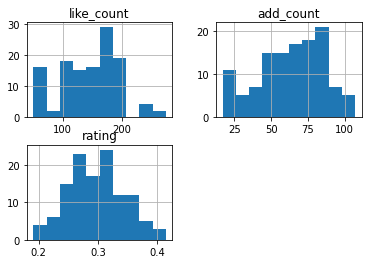

In [ ]:
dfLoc.hist()

In [ ]:
w = gc.open('capstone_dataset').worksheet('wishFeatures')
set_with_dataframe(w, dfLoc)

In [ ]:
# add location id back to userFeatures

In [ ]:
w = gc.open('capstone_dataset').worksheet('userFeatures')
rows = w.get_all_values()
dfUserFeatures = pd.DataFrame.from_records(rows[1:], columns=rows[0])
dfUserFeatures.head()

,user_id,like,add,category,location,location_id
0,0,1,0,beach,LABUAN BAJO,47
1,0,1,0,beach,TAPANULI TENGAH,43
2,0,1,0,beach,UJUNG KULON,9
3,0,1,0,beach,PANTAI SELATAN,26
4,0,1,0,beach,MALDIVES,24


In [ ]:
loc_id = { row['location']:row['location_id'] for _, row in dfLoc.iterrows() }

s1 = dfUserFeatures['location'].map(loc_id)

dfUserFeatures = pd.DataFrame({
    'user_id' : dfUserFeatures['user_id'],
    'like' : dfUserFeatures['like'],
    'add' : dfUserFeatures['add'],
    'category' : dfUserFeatures['category'],
    'location' : dfUserFeatures['location'],
    'location_id' : list(s1)
})

dfUserFeatures.head()

,user_id,like,add,category,location,location_id
0,0,1,0,beach,LABUAN BAJO,31
1,0,1,0,beach,TAPANULI TENGAH,54
2,0,1,0,beach,UJUNG KULON,85
3,0,1,0,beach,PANTAI SELATAN,57
4,0,1,0,beach,MALDIVES,36


In [ ]:
w = gc.open('capstone_dataset').worksheet('userFeatures')
set_with_dataframe(w, dfUserFeatures)

In [ ]:
## Wish Features

# Save to csv

In [50]:
gc = gspread.authorize(creds)

def get_data(sheet='capstone_dataset', name=None, gc=None):
  worksheet = gc.open(sheet).worksheet(name)
  rows = worksheet.get_all_values()
  df = pd.DataFrame.from_records(rows[1:], columns = rows[0])

  return df

In [55]:
userEmbedding = get_data(name='userEmbedding', gc=gc)
userEmbedding.to_csv('userEmbedding.csv')
files.download("userEmbedding.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
userFeatures = get_data(name='userFeatures', gc=gc)
userFeatures.to_csv('userFeatures.csv')
files.download('userFeatures.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
wishEmbedding = get_data(name='wishEmbedding', gc=gc)
wishEmbedding.to_csv('wishEmbedding.csv')
files.download('wishEmbedding.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
wishFeatures = get_data(name='wishFeatures', gc=gc)
wishFeatures.to_csv('wishFeatures.csv')
files.download('wishFeatures.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>